# Data Science Pipeline with Linear Regression

## Read Data Using Pandas
- pandas is bulit on top of NumPy and can be used with scikit-learn
- pandas DataFrame can be used for X (Feature Matrix)
- pandas Series can be used for y (Response Vector)

In [1]:
import pandas as pd

# Read CSV file directly from URL
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv')

# Display data
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


- Index (or rownames) are set as a column
- Use *index_col* parameter to set that as an index

In [2]:
# Read CSV and set 
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col = 0)

# Display data
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
# Look at the shape of the data frame
data.shape

(200, 4)

200 rows by 4 columns (200 Observations and 4 Features)
- Feauters: 
    - TV: ad dollars spent on TV (in thousands of dollars)
    - Radio: ad dollars spent on Radio
    - Newspaper: ad dollars spent on Newspaper
- Response: 
    - Sales: Product Sales

## Visualize Data using seaborn

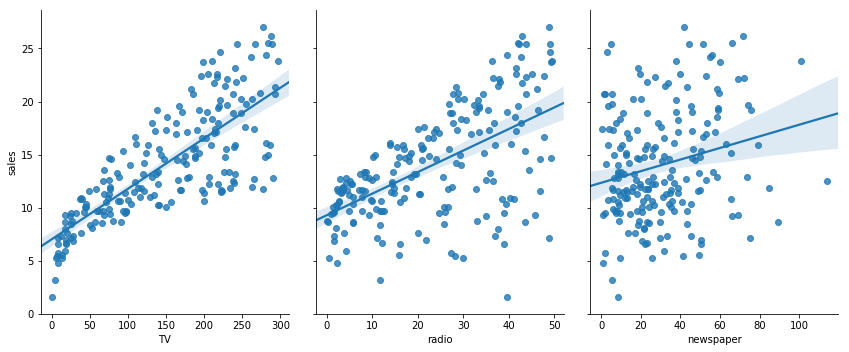

In [12]:
# Import seaborn
import seaborn as sns

# Visualize plots inside the notebook
%matplotlib inline

# Look at relationship between Features and Response using scatterplots
# Increase size and add a Regression line with CI
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=5, aspect=0.8, kind='reg')

- Linear Pattern between TV and Sales
- Less for Radio and Newspaper

# Using Linear Regression: 
- y = B0 + B1x1 + B2X2 + ... + BnXn
    - y = Response
    - B0 = intercept
    - B1 = coefficient to x1 (first Feature)
- B values are model coefficients that are learned during fitting using *least squares* 

## 1. Get the data: Features and Response

In [16]:
# create a Python list of Feature names
features_cols = ['TV', 'radio', 'newspaper']

# Use the list to subset the original DataFrame
X = data[features_cols]

# Same as above in one line:
X = data [['TV', 'radio', 'newspaper']]
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [17]:
# Check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [18]:
# Get the Response Variable from DataFrame: Series
y = data['sales']

# Same as above with a dot notation
y = data.sales

y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [19]:
# Check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


## 2. Data Partition: Split Data (X and y) into Training and Testing Sets

In [22]:
# Import the module to Split the data into Training and Testing
from sklearn.model_selection import train_test_split

# Split by default of 25% Testing, 75% Training
# set seed with random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [23]:
# Print the shapes of the Split Data
print("Training X: ", X_train.shape)
print("Testing X: ", X_test.shape)

print("Training y: ", y_train.shape)
print("Testing y: ", y_test.shape)

Training X:  (150, 3)
Testing X:  (50, 3)
Training y:  (150,)
Testing y:  (50,)


## 3. Train the Linear Regression Model on the Training Set

In [24]:
# import module
from sklearn.linear_model import LinearRegression

# Initiate the Model
linreg = LinearRegression()

# Fit the Model on Training Set
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Look at Model Coefficients:

In [27]:
# Look at intercept and coefficients of the model object
print(linreg.intercept_)
print(linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [32]:
# Use zip function to pair Feature names and the coefficients
# Convert to a list, since zip returns an iterator
list(zip(features_cols, linreg.coef_))

[('TV', 0.046564567874150288),
 ('radio', 0.17915812245088836),
 ('newspaper', 0.0034504647111804065)]

### Final Formula:
- y = 2.88 + (0.046 x TV) + (0.18 x Radio) + (0.0035 x Newspaper)
- unit increase in TV ad, increases Sales by 0.046 units

## 4. Predict on the Testing Set

In [33]:
# Predict on new testing data
y_pred = linreg.predict(X_test)

## 5. Evaluate the Model
- *Accuracy* is used for **Classification** problems
- Evaluation Metric for Regression problems are: **MAE, MSE, RMSE**

### Mean Absolute Error (MAE) Example:
- Mean of the absolute value of the error

In [35]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [40]:
# Calculate MAE manually
print((10 + 0 + 20 + 10)/4)

# Calculate using the scikit-learn metric
from sklearn import metrics
metrics.mean_absolute_error(true, pred)

10.0


10.0

### Mean Squared Error (MSE) Example:
- Mean of the squared errors
- Harder to interperet than MAE

In [47]:
# Calculate MSE manually
print((10**2 + 0**2 + 20**2 + 10**2)/4)

# Calculate using the scikit-learn metric
metrics.mean_squared_error(true, pred)

150.0


150.0

### Root Mean Squared Error (RMSE) Example:
- Square root of the Mean of the squared errors

In [46]:
# Calculate RMSE manuallyimport numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# Calculate using the scikit-learn metric
np.sqrt(metrics.mean_squared_error(true, pred))

12.2474487139


12.24744871391589

### Comaparing Metrics:
- MAE is the easiest to understand, because it's the average error.
- MSE is more popular than MAE, because MSE "punishes" larger errors.
- RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

### Use RSME for Sales Prediction

In [49]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.4046514230328953

- Low RSME since Sales ranges from 5 - 25

# Feature Selection
- Remove Newspaper from the Model since it showed less Linear relatioship with Sales

In [52]:
# 1. Get the data: Features and Response
# create a Python list of feature names
feature_cols = ['TV', 'radio']
# use the list to subset the original DataFrame
X = data[feature_cols]
# select a Series from the DataFrame
y = data.sales

# 2. Data Partition: Split Data (X and y) into Training and Testing Sets
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# 3. Train the Linear Regression Model on the Training Set
# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# 4. Predict on the Testing Set
# make predictions on the testing set
y_pred = linreg.predict(X_test)

# 5. Evaluate the Model
# compute the RMSE of our predictions
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.3879034699382886

- Lower RMSE than before
- Lower RMSE is better, less error

### Model with only TV

In [53]:
# 1. Get the data: Features and Response
# create a Python list of feature names
feature_cols = ['TV']
# use the list to subset the original DataFrame
X = data[feature_cols]
# select a Series from the DataFrame
y = data.sales

# 2. Data Partition: Split Data (X and y) into Training and Testing Sets
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# 3. Train the Linear Regression Model on the Training Set
# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# 4. Predict on the Testing Set
# make predictions on the testing set
y_pred = linreg.predict(X_test)

# 5. Evaluate the Model
# compute the RMSE of our predictions
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

3.2109297077035421

- Much higher RMSE